# Empalme con la clase anterior.

# Gradiente de las RNN.
8:00 pm.
Sabemos desde el curso de ML que el gradiente (backpropagation) es el alma detrás de las redes neuronales.

Para el análisis del gradiente usaremos la Figura 5.28

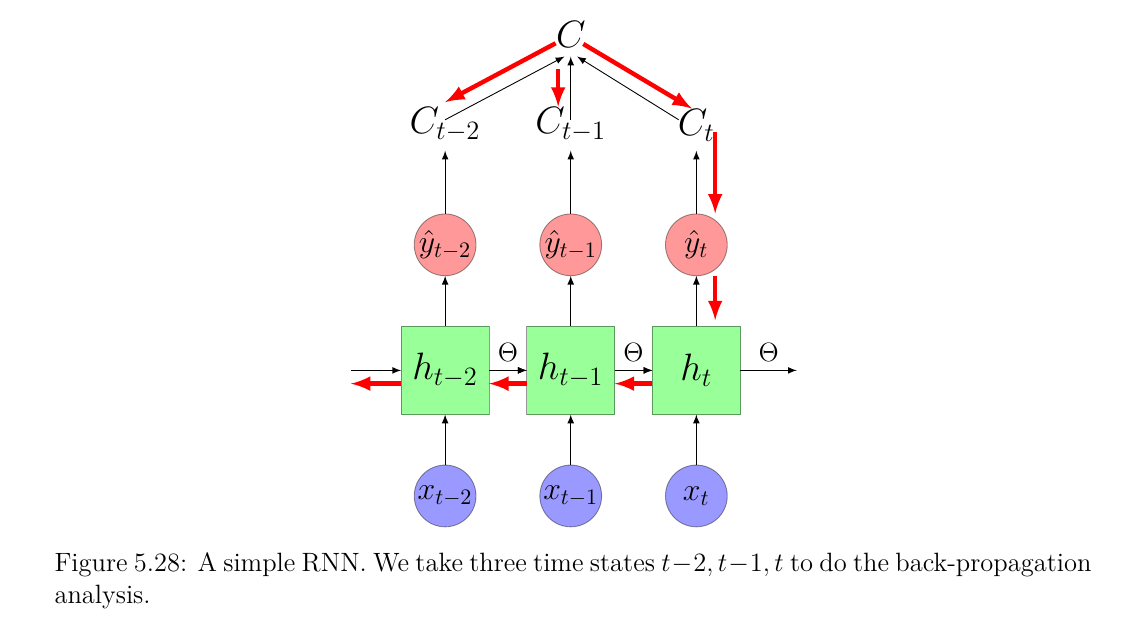

Inicialmente tenemos que

$$C = \frac1T \sum_{t=1}^T C_t $$

Comenzamos por describir el modelo matemático

$$h_t = f(x_t, h_{t-1}, \theta_x, \theta_h) \tag{3} $$
Digamos que $f$ es una activación como logistic sigmoid or tanh  o ReLU, etc.
de igual forma

$$\hat{y}_t = g(h_t, \theta_y) $$
Digamos que $g$ es una softmax.

Tenemos que hallar

$$\frac{\partial C_k}{\partial \theta_h} \quad , \quad  
\frac{\partial C_k}{\partial \theta_x}  \quad , \quad
\frac{\partial C_k}{\partial \theta_y} \tag{4} $$

Recordamos del apéndice la regla de la cadena. De La Figura 5.28
$$C_k(y_{t}(h_t)) $$
La regla de la cadena para $C_k$ como función de $h_t$ está dada por

$$ \frac{\partial C_k}{\partial h_t} = \sum_i \frac{\partial C_k}{\partial \hat{y}_{ti}} \frac{\partial \hat{y}_{ti}}{\partial h_t}=
\frac{\partial C_k}{\partial \hat{y}_t} \cdot \frac{\partial \hat{y}_t}{\partial h_t} =  \left (\frac{\partial C_k}{\partial \hat{y}_t} \right )^T \frac{\partial \hat{y}_t}{\partial h_t}.$$

En general abusando de la notación (no escribo el $^T$ )

$$\frac{\partial C_k}{\partial h_t} = \frac{\partial C_k}{\partial \hat{y}_t } \frac{\partial \hat{y}_t}{\partial h_t}.$$

Como el gradiente para el "backpropagation" es con respecto a $\theta$, estimemos primero de los gradientes en (4).

$$\frac{\partial C_k}{\partial \theta_h} = \frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_t}{\partial h_t} \frac{\partial h_t}{\partial \theta_h} \tag{4a} $$

Las dos primeras derivadas de la derecha no son complicadas por que tanto $C_k$ como $g=\hat{y}_t$ son funciones analíticas (funcion de costo y función de activación). Aca lo dificil es $\partial h_t / \partial \theta_h$.
Por que es dificil? por la recursión. $h_t=f(h_{t-1}, ... )$.


$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}} \frac{\partial h_{t-1}}{\partial \theta_h} \tag{5} $$

Para poder entender esta recursividad mejor, escribimos (notación)

$$a_t = b_t + c_t a_{t-1}  \tag{6}$$
donde
$$a_t = \frac{\partial h_t}{\partial \theta_h} \quad, \quad b_t= \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h}
\quad , \quad c_t =  \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial h_{t-1}} $$

Queremos "desenrollar" la Ecuación (6).

Para comenzar asumismos que $a_0=0$
\begin{eqnarray}
a_1 &=& b_1 \\
a_2 &=& b_2 + c_2 a_1 = b_2 + c_2 b_1 \\
a_3 &=& b_3 + c_3 a_2 = b_3 + c_3 (b_2 + c_2 b_1) = b_3 + c_3 b_2 + c_3 c_2 b_1 \\
a_4 &=& b_4 + c_4 a_3 = b_4 + c_4 (b_3 + c_3 b_2 + c_3 c_2 b_1) = b_4 + c_4 b_3 + c_4 c_3 b_2 + c_4 c_3 c_2 b_1 \\
&\vdots&  \\
a_t &=& b_t + \sum_{i=1}^{t-1} b_i \prod_{j=i+1}^t c_j.
\end{eqnarray}

Con este patrón podemos escribir la Ecuación (5) como

$$\frac{\partial h_t}{\partial \theta_h} = \frac{\partial f(x_t, h_{t-1}, \theta_x, \theta_h)}{\partial \theta_h} + \sum_{i=1}^{t-1}
\frac{\partial f(x_i, h_{i-1}, \theta_x, \theta_h)}{\partial \theta_h}
\prod_{j=i+1}^t \frac{\partial f(x_j, h_{j-1}, \theta_x, \theta_h)}{\partial h_{j-1}} \tag{7} $$


Verifiquemos
Asumamos el primer caso $a_0=0$. Si $t=1$.

$$h_1 = f(x_1, h_0, \theta_x, \theta_h) $$

Si tomamos la derivada

$$\frac{\partial h_1}{\partial \theta_h} = \frac{\partial f(x_t, 0, \theta_x, \theta_h)}{\partial \theta_h} $$
Si nos vamos a la Formula (7),

Ya con esto y las formulas analíticas para $C_k$ y $\hat{y}_t$ podemos
estimar (4a).

Voviendo a la Ecuación (4) falta

$$\frac{\partial C_k}{\partial \theta_x} $$

$$\frac{\partial C_k}{\partial \theta_x} =
\frac{\partial C_k}{\partial \hat{y}_t} \frac{\partial \hat{y}_k}{\partial h_t} \frac{\partial h_t}{\partial \theta_x} \tag{8}
$$


El cálculo de
$$\frac{\partial C_k}{\partial \hat{y}_t} $$
es analítico por que $C_k$ es una función analítica de la función de
activación $\hat{y}_t$.

La derivada parcial

$$\frac{\partial h_t}{\partial \theta_x} $$
Se deja de tare para la próxima semana.

Vamos a ser mas explícitos.

Escribimos de nuevo las ecuaciones para $f,g$ pero ya con pesos matriciales específicos.

Asuma $x_t \in \mathbb{R}^n$, $h_t \in \mathbb{R}^p$, $W \in \mathbb{R}^{m \times n}$, $\Theta \in \mathbb{R}^{m \times p}$ y $U \in \mathbb{R}^{q \times p}$.

Entonces

$$f(x_t, h_{t-1}, W, \Theta) = f( W x_t + \Theta h_{t-1}) \tag{9}$$
$$g(h_t, U) = g(U h_t) $$
donde $(\theta_x, \theta_h, \theta_y) = (W, \Theta, U) \tag{10}$

Recuerde la Ecuacion (8). el primer factor no es problema, ya lo discutimos.
Para el segundo factor, recuerde que $g=\hat{y}_k$ es decir

$$\frac{\partial \hat{y}_t}{\partial h_t} = \frac{\partial g}{\partial h_t} $$
De la Ecuacion 10, ver apendice

$$\frac{\partial g}{\partial h_t} = \frac{\partial g}{\partial z} U $$
donde $z=U h_t$.



Veamos la tercera derivada parcial en (4).

$$\frac{\partial C_k}{\partial \theta_y} = \frac{\partial C_k}{\partial g} \frac{\partial g}{\partial z} \frac{\partial z}{\partial \theta_y } \tag{11}$$
Recuerden que $\theta_y = U$, $z=\theta_y h_t = U h_t$.
Los dos dos primeros factores de (11) son analiticos y fáciles de calcular.  El tercer casctor es

$$\frac{\partial z}{\partial \theta_y} = h_t $$


Regresamos al termino dificil $\partial f(x_t, h_{t-1}, W, \Theta)/\partial \theta_h$

Asumaoms que $f$ es un vector de componentes $(f_r)$ indexado con $r$. Llamos el arugmento de $f$.  $\xi =W x_t + \Theta h_{t-1} $
Llevando a componentes

$$ \xi_j = W_{jk} (x_t)_k + \Theta_{jk} (h_{t-1})_k$$
Usando la notacion de Einstein. Es decir, la expresion anterior es una suma sobre $k$.

Necesitamos calcular derivadas parciales. Comenzamos con el argumento $\xi_j$ (por que vamos a usar la regla de la cadena)

$$
\frac{\partial \xi_j}{\partial W_{pq}} = \delta_{jp} \delta_{kq} (x_t)_k = \delta_{jp} (x_t)_q.
$$

Entonces
$$\frac{\partial f_r}{\partial W_{pq}} = \frac{\partial f_r}{\partial \xi_j} \frac{\partial \xi_j}{\partial W_{p
\frac{}{}q}} =  \frac{\partial f_r}{\partial \xi_j} \delta_{jp}(x_t)_q = \frac{\partial f_r}{\partial \xi_p} (x_t)_q $$


De igual forma (tarea para la proxima semana)

$$\frac{\partial f_r}{\partial \Theta_{pq}} = \frac{\partial f_r}{\partial \xi_p} (h_{t-1})_q $$


Tenemos que evaluar las deivadas dentro de la $\Pi$, en
la Ecuacion (7).

Llamos
$$\xi = W x_t + \Theta h_{t-1} $$

En componentes

Usando notacion de Einstein
$$\xi_j = (W x_t)_j  + (\Theta h_{t-1})_j = W_{jk} ( x_t)_k + \Theta_{jk} ( h_{t-1})_k  $$



De forma que

$$
\frac{\partial f_r }{\partial (h_{j-1})_s}
= \frac{\partial f_r}{\partial \xi_p} \frac{\partial \xi_p}{\partial (h_{j-1})_s} = \frac{\partial f_r}{\partial \xi_p}
\Theta_{pk} \delta_{ks} = \frac{\partial f_r}{\partial \xi_p}
(\Theta)_{ps}
$$

Escribiendo esto de forma matricial, encontramos

$$\frac{\partial f_r}{\partial h_{j-1}} = \frac{\partial f_r}{\partial \xi} \Theta \tag{11} $$

# Discusion acerca de la ecuacion (11) y el vanishing/exploding gradient.

Recuerque que la Ecuacion (11) está dentro de una productoria y que $\Theta$ es constante (para todos los $t$, solo cambia cuando se hace una nueva epoca). Entonces tenemos algo como

$$\Theta^T $$
donde $T$ es el numero de iteraciones en la red recurrente.

Pueden pasar dos cosas

1. $\rho(\Theta) > 1$
El radio espectral $\rho(\Theta)$ es el mayor valor singular.
Cuando exponencia una matriz, se exponencian los autovalores (valores singulares). Si $\rho(\Theta) > 1$, entonces en esa exponenciacion la matriz $\Theta^T $ diverge.
Exponenciar una matriz tiene sus riesgos. Autovalores $|\lambda_i | > 1$ empujan la potencia de la matriz al infinto. Y autovalores $| \lambda | < 1$ empujan la potencia de la matriz a 0.

2. $\rho(\Theta) < 1$ entonces la exponenciacion empuja la potencia hacia 0.

En el primer caso hablamos del **exploding gradient**.
En el segundo caso hablamos del **vanishing gradient**.

Para ser honestos no es exactmente $\Theta^T$ lo que es, es
La expresion (11) implica

$$ \prod_{t=1}^T \frac{\partial f_r}{\partial \xi} \Theta$$
Como el producto de matrices no es conmutativo, no puedo decir que esto es

$$\Theta^T \prod_t \frac{\partial f_r}{\partial \xi} $$
Sin embargo es cierto que $\Theta$ esta repeditamente multiplicado en esta productoria y que esta multiplicación repetitiva tira potencias al infinito (grandes) o a cero.
Esta la cause el problema del vanishing/exploding gradient en las RNN. Las RNN deben ser cortas para evitar este problema.

Para las 8:00 pm tenemos

## Metodos para curar el vanishing/exploding gradient

* Gradient Clipping: Cuando el gradiente se vuelve muy grande se puede poner un umbral. Si el gradiente pasa el umbral, se corta al umbral.  Si es muy pequeño tambien. Por ejemplo el umbral es $10^{-4}$. Si el gradiente baja de ahi, se cambia por $10^{-4}$.

* Regularizacion: Por ejemplo el **dropout** ayuda a la estabilizacion de la red. Normalización usando metricas $\ell_1$ o $\ell_2$.
* Choose the right Activation functions: Por ejemplo usar ReLU, el gradiente (en la parte positiva) es 1 (o la identidad).
* Weight regularization: Controlar los pesos, filtrarlos para que sean mas suaves.
* Weight initialization design: Hay un artículo de Xavier Glorot y Yoshua Bengio que inicializa los pesos de forma que
hace que el gradiente sea mas estable. Seguimos a las 8:00.

El articulo es:

Xavier Glorot and Yoshua Bengio. Understanding the difficulty of training deep feed-
forward neural networks. In Yee Whye Teh and Mike Titterington, editors, Proceed-
ings of the Thirteenth International Conference on Artificial Intelligence and Statistics,
volume 9 of Proceedings of Machine Learning Research, pages 249–256, Chia Laguna
Resort, Sardinia, Italy, 13–15 May 2010. PMLR.

La idea es que en la inicializacion (antes de la epoca 1).
Los pesos se inicialicen de acuerdo a la siguiente fórmula.


En cada capa con número de nodos $n_{in}$, $n_{out}$
$$\frac12 (n_{in} + n_{out}) \sigma²  
\begin{cases}
> 1 \quad , \quad \text{ produce gradiente (exploding)} \\
= 1 \quad , \quad \text{el sistema es estable} \\
< 1 \quad , \quad \text{el sistema sufre de "vanising gradient"}
\end{cases}
$$

Según esto, ellos, en la inicialización existen una desviación estandard $\sigma$

$$\sigma = \sqrt{ \frac{2}{n_{in} + n_{out} }} $$

* Gated cells (en particular el LSTM que vemos a continuacion).

Ellos muestran los resultados en un experimento en la siguiente gráfica.



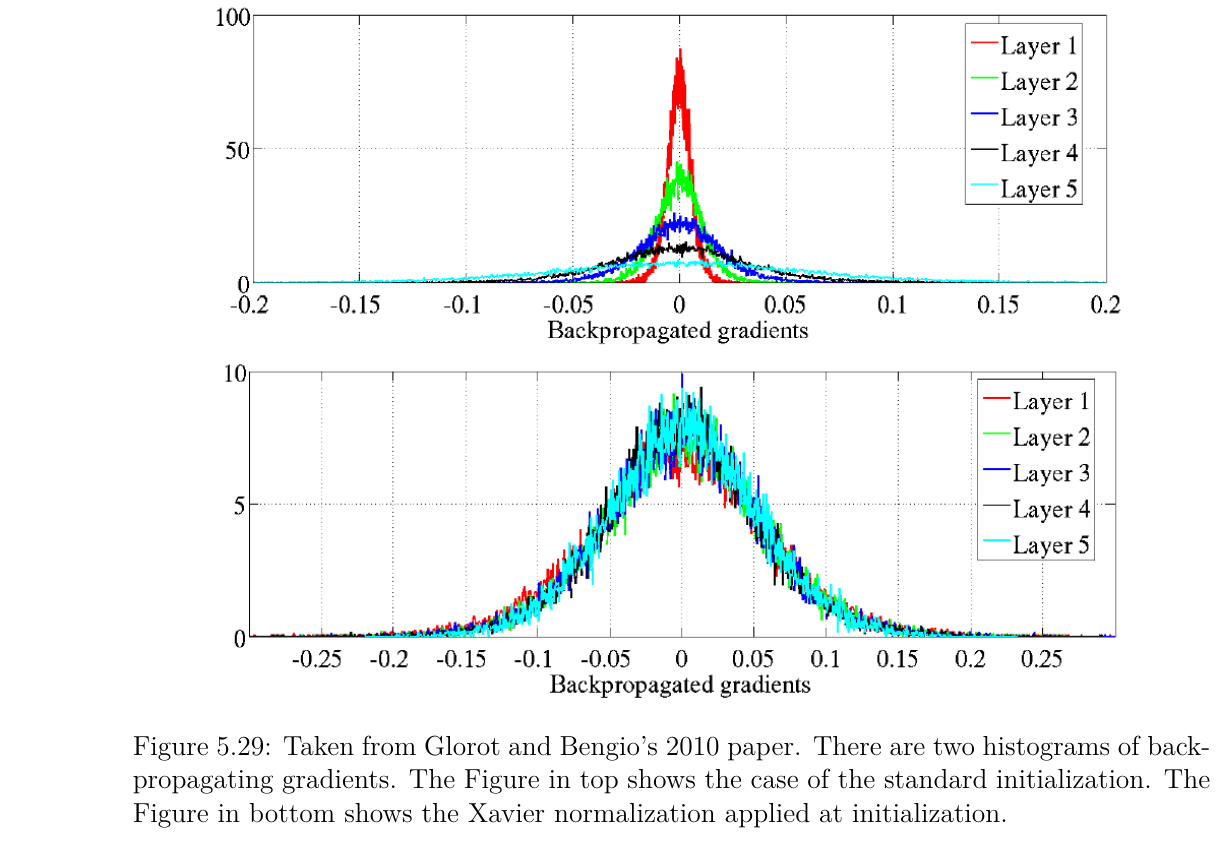

Sin embargo los investigadores siguieron buscando mejores métodos para evitar el vanishing/exploding gradient y poder hacer recursiones mas profundas.

* Gated Cells: Veremos enseguida la LSTM y en la próxima clase la GRU (Gated Rrecurring Units).

# LSTM:

 Sepp Hochreiter and Jürgen Schmidhuber. Long short-term memory. Neural computa-
tion, 9(8):1735–1780, 1997.


Las RNN clasicas (que las llaman vainilla) no pueden tener mucha profundidad por el problema del vanishing/exploding gradent. Por ejemplo en NLP (Natural Language Processing)
piense en la frase (ingles)

" Henry orders **burritos** every time he goes to a restaurant. He must love the cuisine from **Mexico**. "

Llegaron las LSTM (Long Short Term Memory) a arreglar el problema.

## Propagación hacia adelante de las LSTM.
Las vanilla RNN funcionan con la function

$$h_t = f( \Theta_x x_t + \Theta_h h_{t-1}) $$

La primera aproximación de tres pasos de una RNN vainilla se muestran en la Figura 3.30


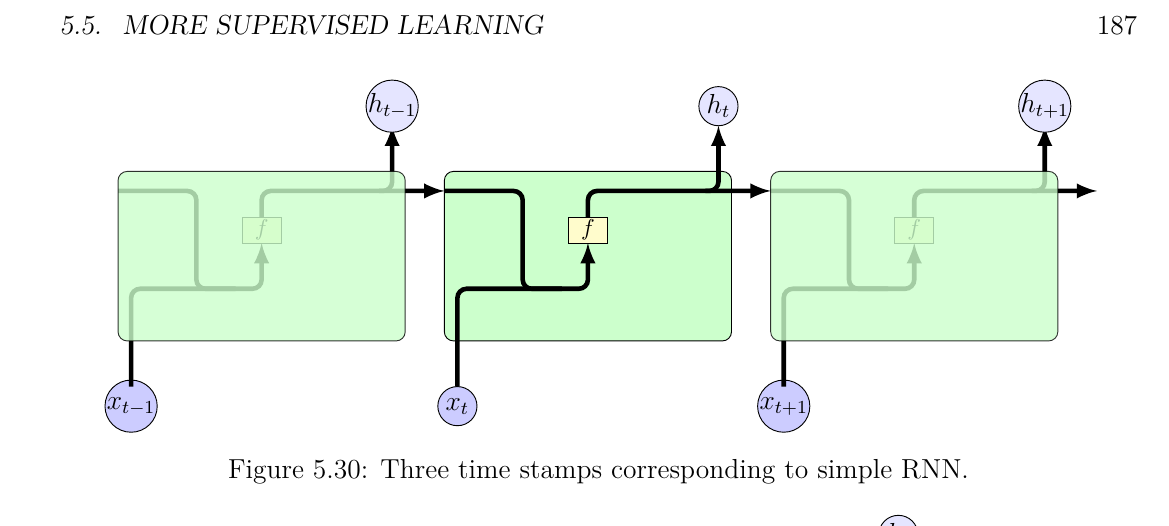

Las LSTM son mucho mas complejas y las explicamos aca.
Observe la Figura 5.31.

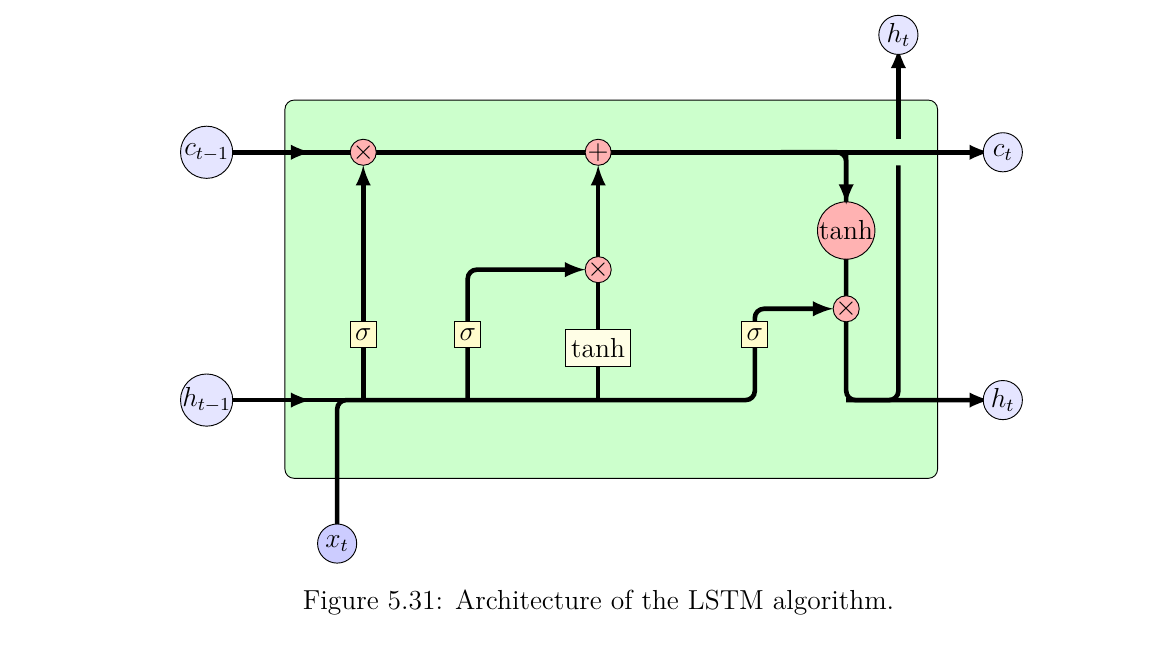

La Figura 5.31 muestra la arquitectura de las LSTM. Vamos a explicar con detalle las tres puertas (gates) que estructuran esta arquitectura.

Marcamos las puertas (gates) en la Figura 5.32

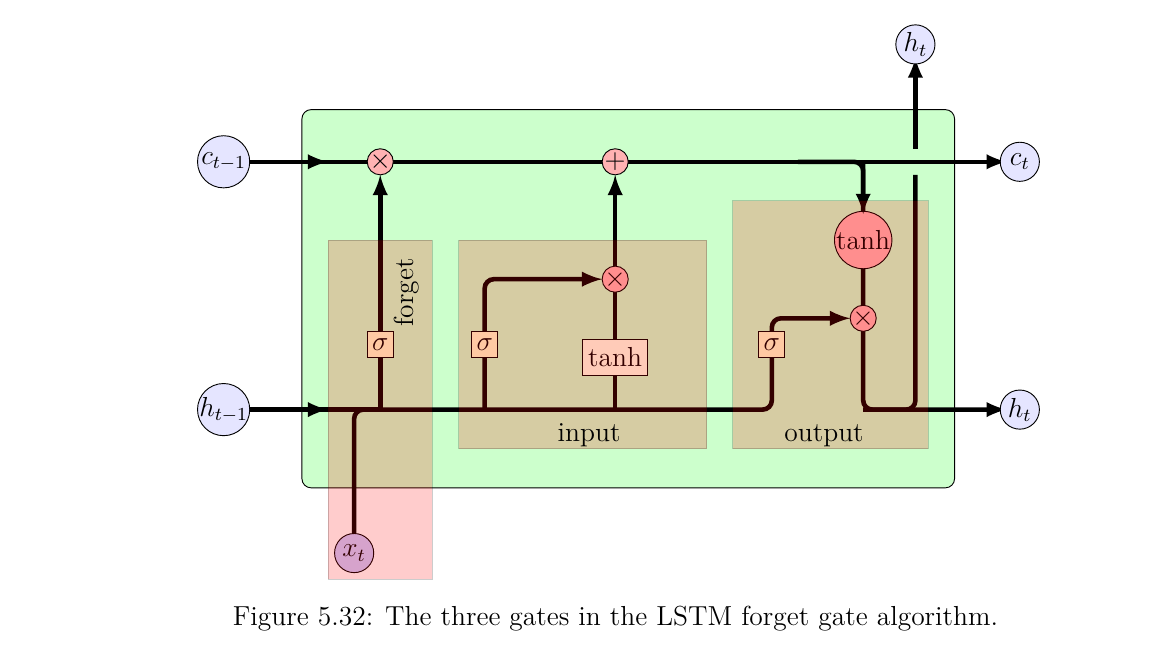

## Forget gate (puerta de olvido).
La matemática se condensa en la fórmula

$$f_t = \sigma(W_f x_t + U_f h_{t-1} + b_f) $$
donde
* $x_t$ los datos de entrada (una palabra)
* $h_{t-1}$ es la memoria corta (short memory) el tiempo anterior
* $c_{t-1}$ la memoria larga en el tiempo anterior.
* $W_t, U_f, b_f$ son los pesos para $x_t, h_{t-1}$ y el bias.

$$x_t \in \mathbb{R}^d \quad , \quad h_{t-1} \in \mathbb{R}^h \quad , \quad W_f \in \mathbb{R}^{h \times d} \quad , \quad U_f \in \mathbb{R}^{h \times h}  \quad , \quad b_f \in
\mathbb{R}^h \quad , \quad f_t \in \mathbb{R}^h $$
La razón por que se llama "forget" es por que $\sigma$ esta $[0,1]$, y el 0 **olvida** y el 1 recuerda.

## Input gate.
La matemática está descrita por dos funciones

$$i_t = \sigma( W_i x_t  + U_i h_{t-1} + b_i) $$
$$\tilde{c} = \tanh(W_g x_t + U_g h_{t-1} + b_g) $$
donde
$$W_i, W_g \in \mathbb{R}^{h \times d} \quad, \quad U_i, U_g \in \mathbb{R}^{h \times h} \quad, \quad b_i, b_g \in \mathbb{R}^h $$

Hay dos nodos $\otimes$, y $\oplus$. Es una suma de multiplicaciones.
Entra arriba $c_{t-1}$ multiplica la forget $f_t$.
De otro lado $i_t$ multiplica a $\tilde{c}_t$.
La suma da $c_t$. Es decir

$$c_t = c_{t-1} \circ f_t + i_t \circ \tilde{c} $$

La Figura 5.33 muestra el input gate.

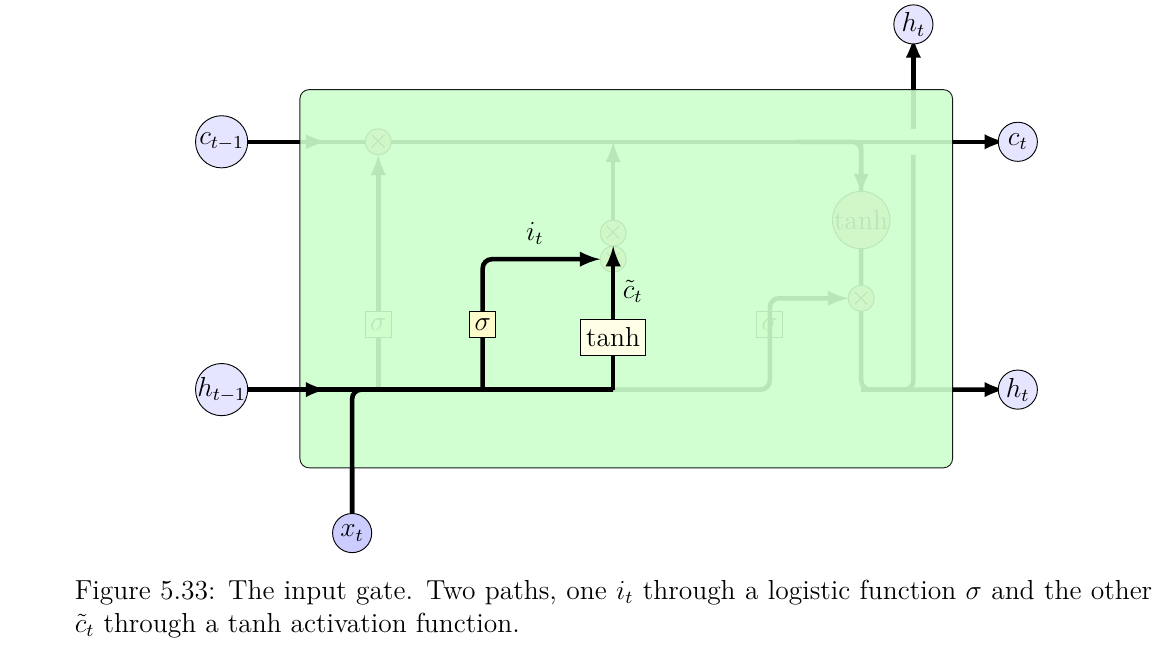

La Figura 5.35 muestra el computo de $c_t$.

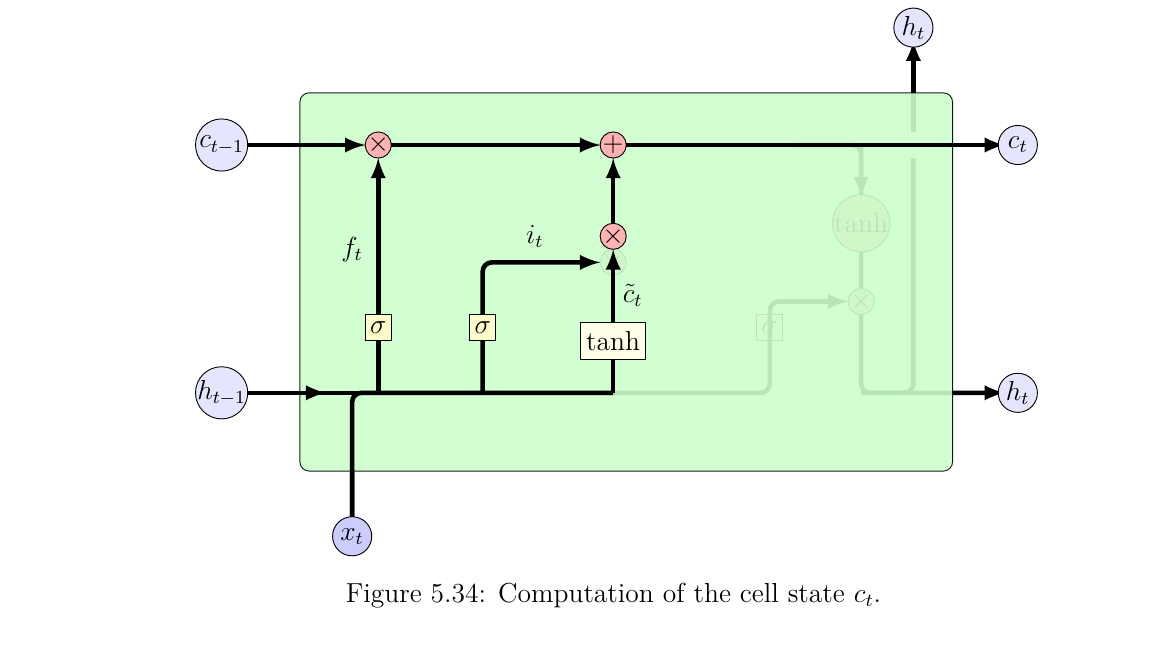

El output gate se muestra en la figura 5.35

ii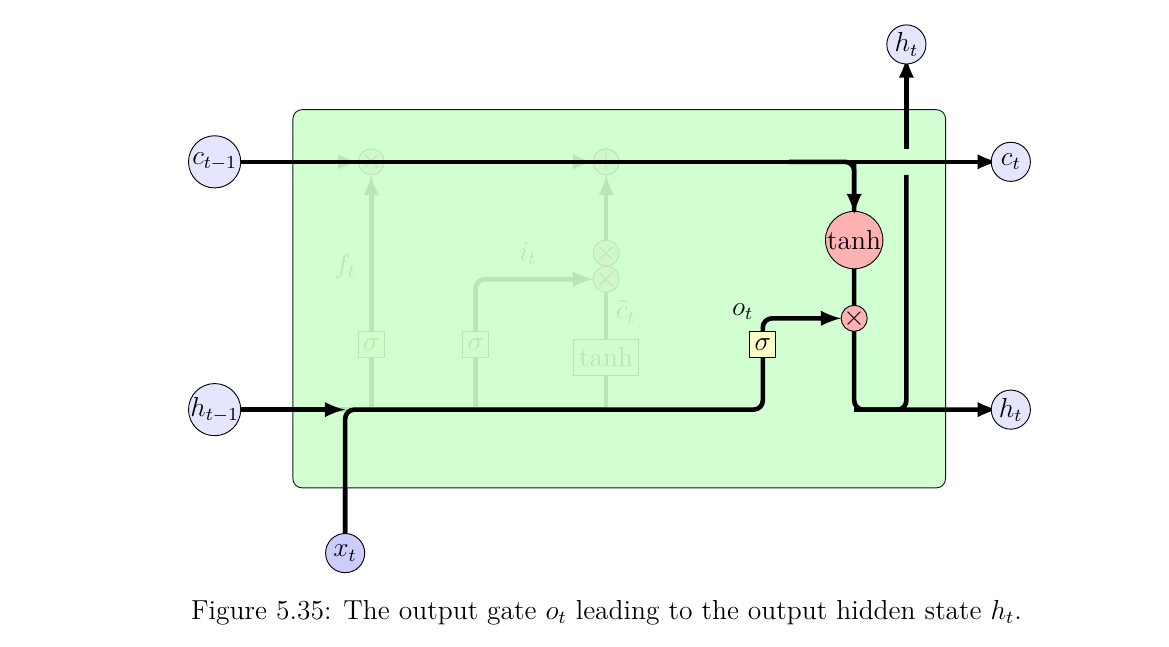

La matematica es:

$$o_t = \sigma( W_0 x_t + U_0 h_{t-1} + b_0) $$

El short term memory es
$$h_t = \tanh(c_t) \circ o_t $$

Hay varias variantes de las LSTM. Una de ellas se llama la peephole. Agrega el $c_{t-1}$
b
$$f_t = \sigma(W_f x_t + U_f h_{t-1} + V_f c_{t-1} + b_f)  $$
$$i_t = \sigma(W_t x_t + U_t h_{t-1} + V_t c_{t-1} + b_i)  $$

Algunas veces se remueve el termino en $h_{t-1}$

$$f_t = \sigma(W_f x_t +  V_f c_{t-1} + b_f)  $$
$$i_t = \sigma(W_t x_t +  V_t c_{t-1} + b_i)  $$

Otra variante se llama la **peephole convolution**:

$$f_t = \sigma(W_f * x_t + U_f * h_{t-1} + V_f \circ c_{t-1} + b_f)  $$
$$i_t = \sigma(W_i * x_t + U_i * h_{t-1} + V_i \circ c_{t-1} + b_i)  $$
$$c_t = f_t \circ c_{t-1} + i_t \circ \tanh(W_c * x_t + U_c*h_{t-1} + b_c) $$
$$o_t = \sigma(W_o * x_t + U_o * h_{t-1} + V_o \circ c_{t-1} + b_o)  $$
$$h_t = o_t \circ \sigma(c_t). $$

**Ejemplo 5.5.1**:
Asumamos que tenemos unos datos de acciones (stocks) para solo 4 días como lo muestra la gráfica 5.37.

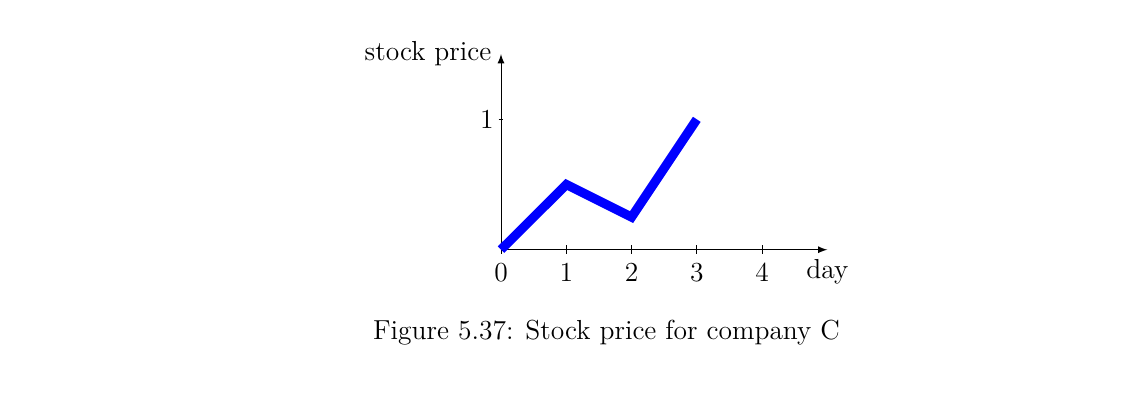

Ver este video
[StackQuest](https://www.youtube.com/watch?v=YCzL96nL7j0) Para mas detalles.

  This corresponds to the points $(0,0),(1,0.5), (2,0.25), (1,1)$.
  Find the stock price in day 4 using an LSTM architecture, starting with $c_0=0, h_0=0$, and
  the following weights:



  \begin{eqnarray*}
    W_f = -1.2 \quad , \quad   U_f&=&2.3 \quad , \quad b_f=0.62 \\
    W_i = 0.65 \quad , \quad   U_i&=&0.4 \quad , \quad b_i=-1.4 \\
    W_g = -0.9 \quad , \quad   U_g&=&-1.41 \quad , \quad b_g=0.22 \\
    W_o = 0.39 \quad , \quad  U_o&=&4.38 \quad , \quad b_o=0.79 \\
  \end{eqnarray*}


  * {Día 1 ($t=1$):}
  Start with zeros:
  Data value $x_0=0, c_0=0$, and $h_0=0$

  Let us find the forget cell
  $$ f_1 = \sigma(-1.2 \cdot 0 + 2.3 \cdot 0 + 0.62) \approx 0.65. $$
  Now for the input, the sigmoid part

  $$i_1 = \sigma(0.65 \cdot 0 + 0.4 \cdot 0 + -1.4) \approx 0.2 .$$
  We evaluate the gate cell from
  $$g_1 = \tanh(-0.9 \cdot 0 + -1.41 \cdot 0 + 0.22) \approx 0.22 .$$

  The output cell, produces
  $$o_1 = \sigma(0.39 \cdot 0 + 4.38 \cdot 0 + 0.79) \approx 0.69  .$$

  Now for the long term memory cell We assume $c_{t-1}=0$, and from
  $c_t=c_{t-1}  \circ f_t + i_t \circ
  \tilde{c}$, here $\tilde{c}=g_1$.
  $$c_1 = 0.65 \cdot 0  + 0.2 \cdot 0.22 \approx 0.04 .$$

  Finally for the short term memory on day 1.

  $$h_1 = 0.69 \cdot \tanh(0.04) \approx 0.03 .$$


  Likewise , using the new data for $h_1, c_1$ above with the input data $x_t$
*  {Día 2 ($t=2$):}

  \begin{eqnarray*}
    f_2 &=& 0.52 \\
    i_2 &=& 0.26 \\
    g_2 &=& -0.27 \\
    o_2 &=& 0.75 \\
    c_2 &=& -0.05 \\
    h_2 &=& -0.03
  \end{eqnarray*}

 * Día 3  (t=3):}

  \begin{eqnarray*}
    f_3 &=& 0.56 \\
    i_3 &=& 0.22 \\
    g_3 &=& 0.04 \\
    o_3 &=& 0.68 \\
    c_3 &=& -0.02 \\
    h_3 &=& -0.01
  \end{eqnarray*}


* Día 4 (t=4):
  It can be shown, doing the same type of calculations above that

  \begin{eqnarray*}
    f_4 &=& 0.35 \\
    i_4 &=& 0.32 \\
    g_4 &=& -0.58 \\
    o_4 &=& 0.76 \\
    c_4 &=& -0.19 \\
    h_4 &=& -0.14
  \end{eqnarray*}
  So, the predicted stock value for day 4 is approximately -0.14.
  Clearly stocks cannot have a negative value. This is telling us that the weights
  for the network might need adjustment. The adjustment of the weights is through
  back-propagation. This is shown in the next section.

  This example is a small toy problem. In reality problems have much more data. Istead
  of scalars as shown here, they would be vectors in $\mathbb{R}^h$, for some integer
  $h > 1$.

